# TRAINING KDD1998 REGRESSOR

Customer simulation classifier to predict donation amount in direct marketing.

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Euclid'
from scipy import stats as sc
import random
import math

from sklearn.metrics import roc_curve, auc
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.


# Set Seed

In [2]:
RANDOM_SEED = 777
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Load Data

In [3]:
data = pd.read_csv("C:/Users/jobake/Desktop/Customer_Simulation/kdd1998tuples.csv", header=None)
data.columns = ['customer', 'period', 'r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income',
                'zip_region', 'zip_la', 'zip_lo', 'a', 'rew', 'r1', 'f1', 'm1', 'ir1', 'if1',
                'gender1', 'age1', 'income1', 'zip_region1', 'zip_la1', 'zip_lo1']
data['rew_ind'] = (data['rew'] > 0) * 1
data['age'][data['age'] == 0] = None

C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Prepare Data

In [4]:
customers = list(set(data['customer']))

train_samples = 100000
val_samples = 50000
test_samples = len(customers) - val_samples - train_samples

np.random.shuffle(customers)

train_customers = customers[0:train_samples]
val_customers = customers[train_samples:(train_samples + val_samples)]
test_customers = customers[(train_samples + val_samples):]

cols = ['r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income', 'zip_region', 'a', 'rew', 'rew_ind']

train_data = data[data['customer'].isin(train_customers) & data['rew_ind'] == 1][cols].fillna(0)
val_data = data[data['customer'].isin(val_customers) & data['rew_ind'] == 1][cols].fillna(0)
test_data = data[data['customer'].isin(test_customers) & data['rew_ind'] == 1][cols].fillna(0).sample(1000, random_state=RANDOM_SEED)

n_train = train_data.shape[0]
n_val = val_data.shape[0]
n_test = test_data.shape[0]

cols_X = ['r0', 'f0', 'm0', 'ir0', 'if0', 'gender', 'age', 'income', 'zip_region', 'a']
cols_Y = ['rew']

x_train = train_data[cols_X].values.astype(np.float32)
y_train = train_data[cols_Y].values.astype(np.float32)

x_val = val_data[cols_X].values.astype(np.float32)
y_val = val_data[cols_Y].values.astype(np.float32)

x_test = test_data[cols_X].values.astype(np.float32)
y_test = test_data[cols_Y].values.astype(np.float32)

# Create Regressor NN

In [5]:
def KDDRegressor():
    model = Sequential()

    model.add(Dense(output_dim=100, input_dim=10))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=100, input_dim=100))
    model.add(Activation("relu"))
    model.add(Dense(output_dim=1, input_dim=100))

    return model

# Train the Model

In [6]:
n_epochs = 50
batch_size = 100
file_name = "C:/Users/jobake/Desktop/Customer_Simulation/kdd98_propagation_regressor_best.h5"

model = KDDRegressor()
model.compile(loss='mean_absolute_error', optimizer='adam')
checkpoint = ModelCheckpoint(file_name, monitor='val_loss', save_best_only=True, save_weights_only=True)

model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=n_epochs,
          verbose=1, callbacks=[checkpoint], validation_data=(x_val, y_val))

# model.save_weights(file_name, overwrite=True)
# model.load_weights(file_name)

score = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss: ' + str(score))

C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, units=100)`
  after removing the cwd from sys.path.
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, units=100)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\jobake\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(i




Train on 291259 samples, validate on 145457 samples
Epoch 1/50





291259/291259 [==============================] - 140s 480us/step - loss: 4.1537 - val_loss: 4.0909
Epoch 2/50
291259/291259 [==============================] - 143s 490us/step - loss: 4.0316 - val_loss: 4.0998
Epoch 3/50
291259/291259 [==============================] - 138s 473us/step - loss: 4.0087 - val_loss: 4.0264
Epoch 4/50
291259/291259 [==============================] - 114s 392us/step - loss: 3.9949 - val_loss: 3.9845
Epoch 5/50
291259/291259 [==============================] - 142s 486us/step - loss: 3.9858 - val_loss: 3.9875
Epoch 6/50
291259/291259 [==============================] - 145s 498us/step - loss: 3.9723 - val_loss: 3.9896
Epoch 7/50
291259/291259 [==============================] - 146s 501us/step - loss: 3.9660 - val_loss: 3.9838
Epoch 8/50
291259/291259 [==============================] - 140s 480us/step - loss: 3.9567 - val_loss: 3.9819
Epoch 9/50
291259/291259 [==============================] - 

# Validation Functions

In [7]:
def plot_validate(data_true, data_predicted, xlab, ylab, name, n_bins, x_range, y_range, font=15, legend=False,
                  bar_width=0.4):
    hist_true, bin_edges = np.histogram(data_true, bins=n_bins, range=x_range)
    hist_predicted, bin_edges = np.histogram(data_predicted, bins=n_bins, range=x_range)
    hist_true = hist_true / float(sum(hist_true))
    hist_predicted = hist_predicted / float(sum(hist_predicted))

    plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='w')
    plt.bar(bin_edges[:-1], hist_true, bar_width, color="#60BD68", label='Actual Data')
    plt.bar(bin_edges[:-1] + bar_width, hist_predicted, bar_width, color="#FAA43A", alpha=1, label='Simulated Data')
    plt.xlabel(xlab, fontsize=font, labelpad=15)
    if ylab:
        plt.ylabel(ylab, fontsize=font, labelpad=15)
    plt.xlim(x_range[0], x_range[1])
    plt.ylim(y_range[0], y_range[1])

    xt_val = list(set([int(e) for e in bin_edges[:-1]]))
    xt_pos = [float(e) + bar_width for e in xt_val]

    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.tick_params(axis='both', which='minor', labelsize=15)

    plt.xticks(xt_pos, xt_val)
    if legend:
        plt.legend(fontsize=font)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    plt.close()

In [8]:
def KL_validate(data_true, data_predicted, n_bins, x_range, n_samples=10000):
    '''"Pr(KL(simulated data||original) > KL(bootstrap original||bootstrap original))'''

    n = data_true.shape[0]

    hist_true, _ = np.histogram(data_true, bins=n_bins, range=x_range)
    hist_predicted, bin_edges = np.histogram(data_predicted, bins=n_bins, range=x_range)

    simulated_KL = sc.entropy(hist_true + 1, hist_predicted + 1)
    subsampled_KL = []

    for i in range(n_samples):
        index1 = np.random.choice(n, n, replace=True)
        index2 = np.random.choice(n, n, replace=True)
        sample1 = data_true[index1]
        sample2 = data_true[index2]
        hist_sample1, _ = np.histogram(sample1, bins=n_bins, range=x_range)
        hist_sample2, _ = np.histogram(sample2, bins=n_bins, range=x_range)
        subsampled_KL.append(sc.entropy(hist_sample2 + 1, hist_sample1 + 1))

    subsampled_KL = sorted(subsampled_KL)
    pval = sum(simulated_KL < i for i in subsampled_KL) / float(n_samples)
    conf_interval = (0, subsampled_KL[int(math.ceil(n_samples * 0.95)) - 1])
    return simulated_KL, conf_interval, pval, n

# Validate NN Regressor

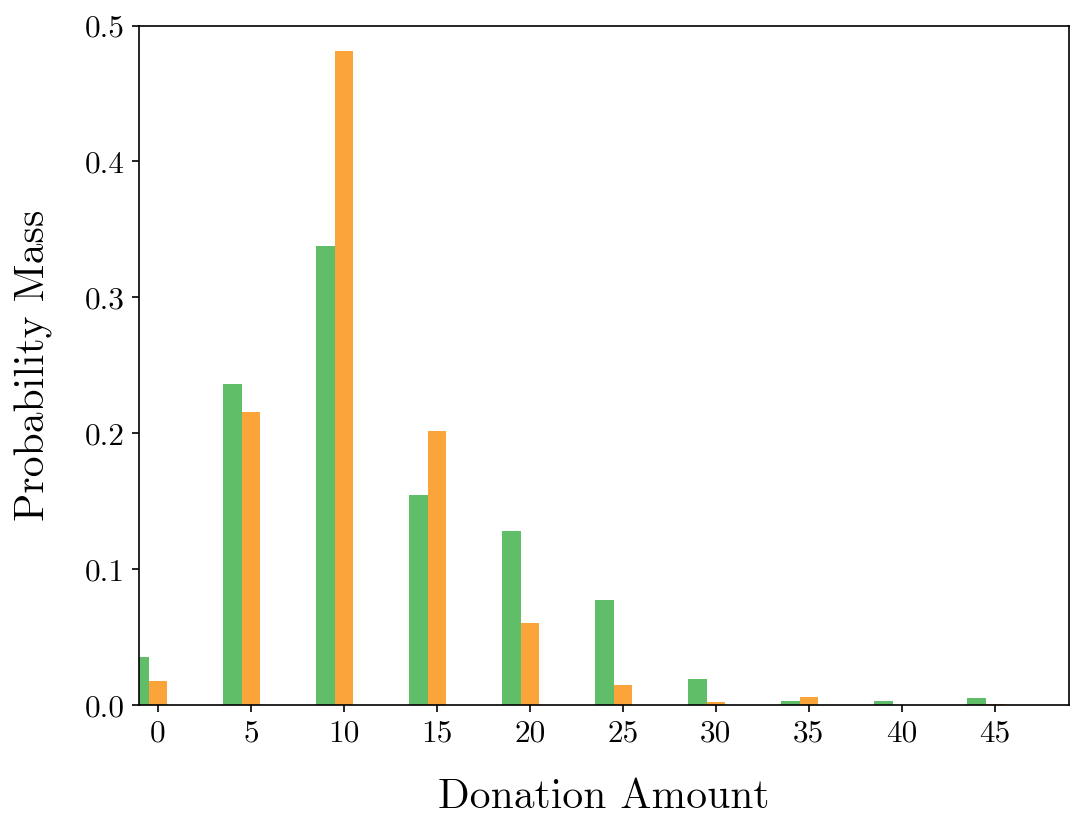

{'test_mean': '13.65413',
 'test_std': '8.870702',
 'KL_divergence_deeplearning': '(0.12109339886866867, (0, 0.009284274411638553), 0.0, 1000)',
 'prediction_mean_deeplearning': '12.629857',
 'prediction_std_deeplearning': '5.5966463',
 'MSE_deeplearning': '51.2418'}

In [9]:
y_pred = model.predict(x_test)

record = dict()
record['test_mean'] = str(y_test.mean())
record['test_std'] = str(np.std(y_test))

record['KL_divergence_deeplearning'] = str(KL_validate(y_test.squeeze(), y_pred.squeeze(), n_bins=5, x_range=(0, 50)))
record['prediction_mean_deeplearning'] = str(y_pred.mean())
record['prediction_std_deeplearning'] = str(np.std(y_pred))
record['MSE_deeplearning'] = str(np.mean((y_pred - y_test) ** 2))

plot_validate(y_test.squeeze(), y_pred.squeeze(), xlab="Donation Amount", ylab="Probability Mass",
              name="C:/Users/jobake/Desktop/Customer_Simulation/kdd98_propagation_regressor_pmf.pdf",
              n_bins=10, x_range=(0, 50), y_range=(0, 0.5), font=20, legend=False, bar_width=1)

record